# <font color='#8333ff'>Régression linéaire simple

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Style des graphes seaborn
sns.set_theme(style="whitegrid")

In [2]:
df=pd.read_csv('ozone.csv',sep=";")
df

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
1,602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
2,603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
3,604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
4,605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,925,84,13.3,17.7,17.8,3,5,6,0.0000,-1.0000,-1.2856,76,Sud,Sec
108,927,77,16.2,20.8,22.1,6,5,5,-0.6946,-2.0000,-1.3681,71,Sud,Pluie
109,928,99,16.9,23.0,22.6,6,4,7,1.5000,0.8682,0.8682,77,Sud,Sec
110,929,83,16.9,19.8,22.1,6,5,3,-4.0000,-3.7588,-4.0000,99,Ouest,Pluie


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   obs     112 non-null    int64  
 1   maxO3   112 non-null    int64  
 2   T9      112 non-null    float64
 3   T12     112 non-null    float64
 4   T15     112 non-null    float64
 5   Ne9     112 non-null    int64  
 6   Ne12    112 non-null    int64  
 7   Ne15    112 non-null    int64  
 8   Vx9     112 non-null    float64
 9   Vx12    112 non-null    float64
 10  Vx15    112 non-null    float64
 11  maxO3v  112 non-null    int64  
 12  vent    112 non-null    object 
 13  pluie   112 non-null    object 
dtypes: float64(6), int64(6), object(2)
memory usage: 12.4+ KB


In [4]:
df.describe(include='all')

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112,112
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ouest,Sec
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,69
mean,763.205357,90.303571,18.360714,21.526786,22.627679,4.928571,5.017857,4.830357,-1.214346,-1.611004,-1.690683,90.571429,NaN,NaN
std,110.149705,28.187225,3.122726,4.042321,4.530859,2.594916,2.281860,2.332259,2.632742,2.795673,2.810198,28.276853,NaN,NaN
min,601.000000,42.000000,11.300000,14.000000,14.900000,0.000000,0.000000,0.000000,-7.878500,-7.878500,-9.000000,42.000000,NaN,NaN
25%,701.750000,70.750000,16.200000,18.600000,19.275000,3.000000,4.000000,3.000000,-3.276450,-3.564700,-3.939200,71.000000,NaN,NaN
50%,729.500000,81.500000,17.800000,20.550000,22.050000,6.000000,5.000000,5.000000,-0.866000,-1.879400,-1.549650,82.500000,NaN,NaN
75%,829.250000,106.000000,19.925000,23.550000,25.400000,7.000000,7.000000,7.000000,0.694600,0.000000,0.000000,106.000000,NaN,NaN


### Nous cherchons à modéliser :      
### <font color='#8333ff'> $$y=\beta_{1}+\beta_{2}X+\varepsilon$$

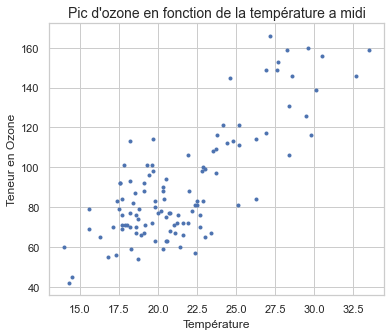

In [5]:
plt.figure(figsize=(6,5))
plt.plot(df['T12'],df['maxO3'],linestyle='none',c='b',marker='.')
plt.title("Pic d'ozone en fonction de la température a midi",fontsize=14 )
plt.ylabel('Teneur en Ozone')
plt.xlabel('Température')
plt.show()

###  $\;\;\;\;\;\;$ $\forall i \in$ {1...n} : $\;\;\;\;\;\;$ $y_{i}=\beta_{1}+\beta_{2}X+\epsilon_{i}$

$\mathbb{E}(\epsilon_{i})=0$  $\;\;\;\;\;\;$ $\;\;\;\;\;\;$ Elles sont centrées autour de 0      
$Var(\epsilon_{i})=\sigma^2$ $\;\;\;\;\;\;$  $\;$ Leur variance, inconnue,est constante et égale à $\sigma^2$     
$Cov(\epsilon_{i},\epsilon_{j})=0$ $\;\;\;\;\;\;$  Si  $i \neq j$ 

### L'estimateur des Moindres Carrés Ordinaires MCO

$\;\;\;\;\;\;$ $ S(\beta_{1},\beta_{2})=\sum_{i=1}^{n}(y_{i}−β_{1}−β_{2}X_{i})^2 $

### La solution :     
###   $\;\;\;\;\;\;$ $\hat{\beta_{1}}=\bar{y}-\hat{\beta_{2}} $    
###   $\;\;\;\;\;\;$ $\hat{\beta_{2}}= \frac {Cov(x,y)}{S^2_{x}}$

### L'équation de la droite de régression est      
###  $\;\;\;\;\;\;$ $y= \hat{\beta_{1}} + \hat{\beta_{2}}x$

### Analyse de la Variance

|$$SCT$$|$$SCE$$|$$SCR$$|
|----|------|------|
|$$\sum_{i=1}^{n}(y_{i}−\bar{y})^2 $$ |$$\sum_{i=1}^{n}(\hat{y_{i}}−\bar{y})^2 $$|$$\sum_{i=1}^{n}(y_{i}−\hat{y_{i}})^2 $$|


###  $\;\;\;\;\;\;$ $SCT=SCE+SCR$
###  $\;\;\;\;\;\;$ $R^2=\frac {SCE}{SCT}$

###  $\;\;\;\;\;\;$ $R^{2}_{ajus}=1-\frac {n}{n-p}(1-R^2)$

****
### Les résidus      
#### La différence entre la valeur observée  et son estimation
####  $\;\;\;\;\;\;$ $e_{i}=y_{i}-\bar{y} $ $\;\;\;\;\;\;$       
#### Le résidu $e_{i}$ est une estimation du bruit $\epsilon_{i}$
####  $\;\;\;\;\;\;$ $\varepsilon{i}=y_{i}-{\beta_{1}} - {\beta_{2}}x$ $\;\;\;\;\;\;$
***

#### Nous posons comme hypothèse
### $$\varepsilon \sim \mathcal{N}(\mu,\sigma^{2})$$
#### Sachant que $\;\;\;\;\;\;$ $\sum_{i=1}^{n}e_{i}=0$ $\;\;\;\;\;\;$  Nous avons
### $$\varepsilon \sim \mathcal{N}(0,\sigma^{2})$$

In [6]:
reg_simple=smf.ols('maxO3 ~ T12',data=df).fit()
print(reg_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     175.8
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.51e-24
Time:                        20:28:46   Log-Likelihood:                -478.91
No. Observations:                 112   AIC:                             961.8
Df Residuals:                     110   BIC:                             967.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.4196      9.033     -3.035      0.0

In [7]:
param=list(reg_simple.params)
param

[-27.419635851181308, 5.46868486741282]

In [8]:
param

[-27.419635851181308, 5.46868486741282]

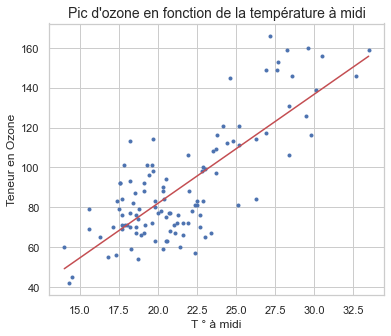

In [9]:
x = np.linspace(min(df['T12']),max(df['T12']))
y=param[0]+x*param[1]

plt.figure(figsize=(6,5))
plt.plot(df['T12'],df['maxO3'],linestyle='none',c='b',marker='.')
plt.plot(x,y,c='r')
plt.title("Pic d'ozone en fonction de la température à midi",fontsize=14 )
plt.ylabel('Teneur en Ozone')
plt.xlabel('T ° à midi')
plt.show()

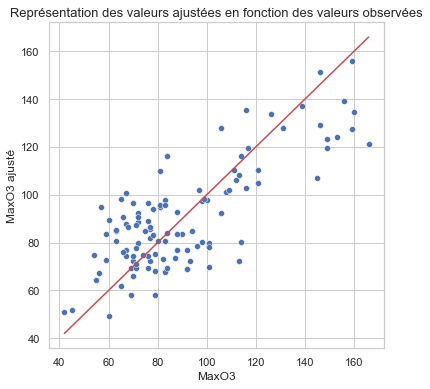

In [10]:
df['maxO3_ajust_s'] = reg_simple.predict()

X_plot = [df['maxO3'].min(), df['maxO3'].max()]

plt.figure(figsize=(6,6))
ax = sns.scatterplot(x="maxO3", y="maxO3_ajust_s", data=df)
ax.set(xlabel='MaxO3', ylabel='MaxO3 ajusté')
plt.plot(X_plot, X_plot, color='r')
plt.title("Représentation des valeurs ajustées en fonction des valeurs observées",fontsize=13)
plt.show()

### Réprésentation des résidus dans notre modèle

In [11]:
df['residus'] = reg_simple.resid

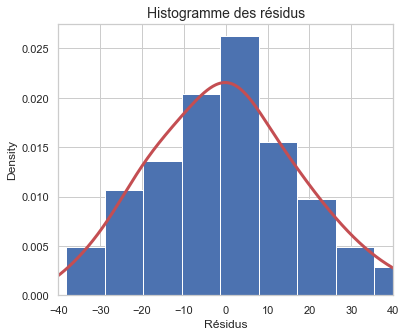

In [12]:
plt.figure(figsize=(6,5))

plt.xlim(-40,40)
plt.hist(df['residus'], density=True,bins=9)
df['residus'].plot(kind='density',c='r',linewidth=3)

plt.xlabel('Résidus')
plt.title('Histogramme des résidus',fontsize=14)

plt.show()

***
## Prévision
>2 méthodes pour prédire la concentration en ozone selon la température à midi
***

In [13]:
prevision = pd.DataFrame({'T12':[19]})
maxO3_prev = reg_simple.predict(prevision)
print(round(maxO3_prev[0], 1))

76.5


In [14]:
prevision=input('saisir une température ')
prevision=float(prevision)
maxO3_prev=param[0]+prevision*param[1]
print(round(maxO3_prev,1))

saisir une température 25
109.3
